### Data Source:
* https://api.covid19india.org/
* https://api.covid19india.org/csv/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = (14, 5)

In [3]:
def get_daily_data():
    url = "https://api.covid19india.org/csv/latest/case_time_series.csv"
    df = pd.read_csv(url)
    df['date'] = df.Date + '2020'
    df.date = df.date.astype('datetime64')
    df.pop('Date')
    df = df.set_index('date')
    return df

In [5]:
def state_wise_test_data():
    url = 'https://api.covid19india.org/csv/latest/statewise_tested_numbers_data.csv'
    df = pd.read_csv(url)
    df['Updated On'] = pd.to_datetime(df['Updated On'], format='%d/%m/%Y')
    test_rate = df[['Updated On', 'State', 'Total Tested', 'Positive']]
    test_rate['positive_rate'] = test_rate['Positive'] / test_rate['Total Tested']
    test_rate.State = test_rate.State.astype('category')
    return test_rate

In [ ]:
def icmr_test_data():
    url = 'https://api.covid19india.org/csv/latest/tested_numbers_icmr_data.csv'
    df = pd.read_csv(url, parse_dates=['Update Time Stamp'], index_col='Update Time Stamp')
    return df

In [6]:
daily = get_daily_data()

In [7]:
daily.tail().T

date,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09
Daily Confirmed,2971,3602,3344,3339,3175
Total Confirmed,49405,53007,56351,59690,62865
Daily Recovered,1295,1161,1475,1111,1414
Total Recovered,14140,15301,16776,17887,19301
Daily Deceased,128,91,104,97,115
Total Deceased,1694,1785,1889,1986,2101


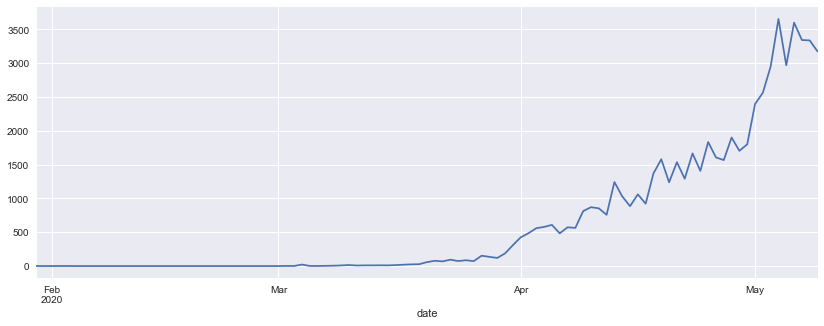

In [8]:
daily['Daily Confirmed'].plot()

In [11]:
df = state_wise_test_data()

In [15]:
df.groupby("State").agg("last").sort_values("Positive", ascending=False)

,Updated On,Total Tested,Positive,positive_rate
State,,,,
Maharashtra,2020-05-10,210174.0,19063.0,0.090701
Gujarat,2020-05-11,109650.0,7797.0,0.071108
Delhi,2020-05-10,84226.0,6542.0,0.077672
Tamil Nadu,2050-05-11,229670.0,6535.0,0.028454
Rajasthan,2020-05-11,159157.0,3708.0,0.023298
Madhya Pradesh,2020-05-09,68010.0,3457.0,0.050831
Uttar Pradesh,2020-05-09,124791.0,3373.0,0.027029
Andhra Pradesh,2020-05-11,165069.0,1930.0,0.011692
West Bengal,2020-05-11,39368.0,1786.0,0.045367


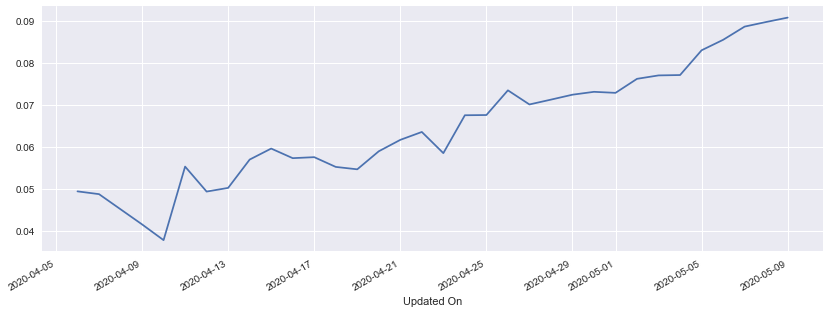

In [16]:
df.loc[df.State=="Maharashtra"].dropna(subset=["Positive"]).set_index('Updated On').positive_rate.plot()